In [33]:
## Importing python liabraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
## ETL - Extact, tranform and load the data
data=pd.read_csv(r"C:\Users\pv11379\OneDrive - Deere & Co\Desktop\Personal folder\Data science\Database/50_Startups.csv")

In [3]:
## copy data into another dataframe
df=data.copy()

# Read the data

In [4]:
## shape of data
print("Total rows in data is- ", df.shape[0])
print("Total columns in data is- ", df.shape[1])

Total rows in data is-  50
Total columns in data is-  5


In [5]:
df.index

RangeIndex(start=0, stop=50, step=1)

In [6]:
df.head(3)## top 3 rows of data with header

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [7]:
df.tail(3)## bottom 3 rows of data with header

,R&D Spend,Administration,Marketing Spend,State,Profit
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [8]:
df.columns ## columns in data

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
## dataype of data
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df.nunique() ## number of unique values in data

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [12]:
df['State'].unique() ## unique state names are

array(['New York', 'California', 'Florida'], dtype=object)

In [13]:
## statistical analysis of data
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [14]:
## any null values in data
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [15]:
df.isna().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [16]:
# inference - No any null values in data.

In [17]:
## correlation in data
df_corr=df.corr()
df_corr

C:\Users\pv11379\AppData\Local\Temp\ipykernel_14788\2148317767.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


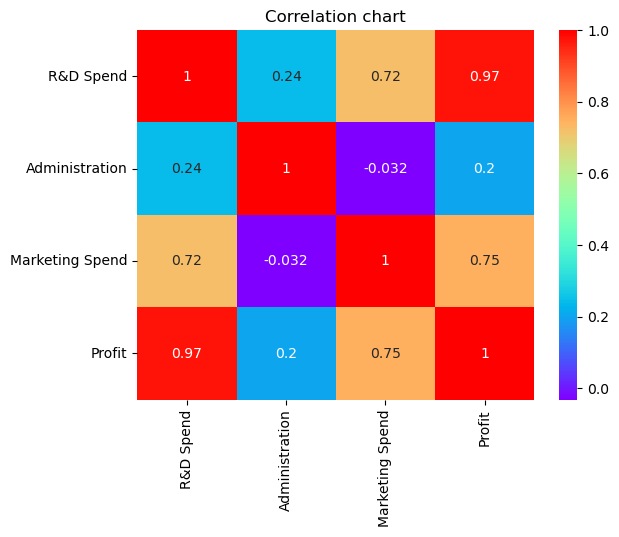

In [18]:
sns.heatmap(df_corr,annot=True,cmap='rainbow')
plt.title("Correlation chart")
plt.show()

In [21]:
## insights -
# R&d with profit having strong correlation.So if we spend more on r&d then more will be profit in business.
# marketing with profit also having good correlation.So we can increase profit by spending more on marketing.
# No correlation between administration and profit. 

# Any outliers in data

In [23]:
## check any outliers in data
col_cont= df.columns[df.dtypes!='O']
print(col_cont)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')


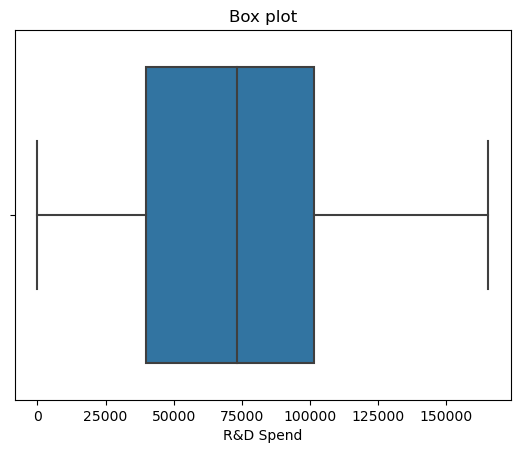

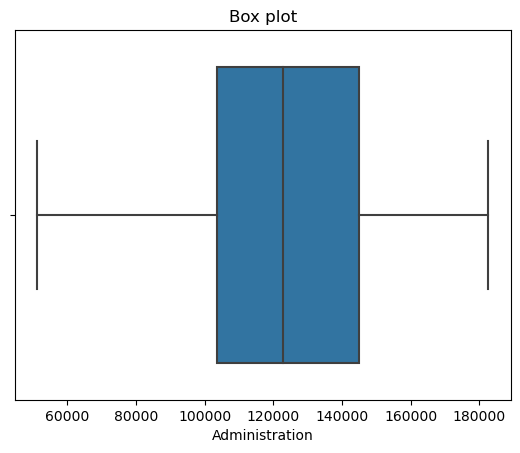

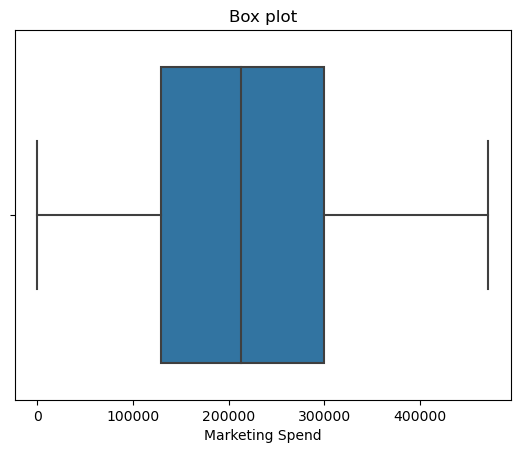

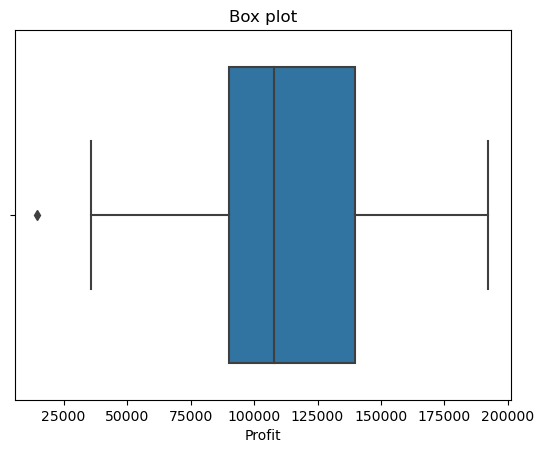

In [24]:
for i in col_cont:
    plt.figure()
    plt.title("Box plot")
    sns.boxplot(x=df[i])

In [ ]:
## insights - No any outliers in continous columns of data.

# EDA - Exploratory Data analysis

In [25]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [26]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [27]:
## Insights - Equally number of times data collected from different state.

In [38]:
px.scatter(df,x='R&D Spend',y='Profit',size='Profit',title='Profit vs R&D Spend',color='State',trendline='ols')


In [30]:
## Inference - 
# R&D spend and Profit is hightly correlate with each other.
# More spend in R&D will give more profit.
# california state profit shows slightly high increase trend wrt to R&D spend.

In [39]:
px.scatter(df,x='Marketing Spend',y='Profit',size='Profit',title='Profit vs Marketing Spend',color='State',trendline='ols')

In [ ]:
## Inference - 
# Marketing spend and Profit is having good correlation.
# More spend in Marketing will give more profit.
# california state profit shows slightly high increase trend with marketing spend.

In [40]:
px.scatter(df,x='Administration',y='Profit',size='Profit',title='Profit vs Administration',color='State',trendline='ols')

In [ ]:
## Insights - No any noticable impact on profit after spending on administration. So we dont need to spend more on 
administration.

In [41]:
## Highest profitable state
px.histogram(df,x='State',y='Profit',color='State',title='State wise profit')

In [ ]:
## Insights - 
# highest profitable state os new york - 1.93M.
# Florida state having 1.90M profitability.
# California state having 1.76M profitability.

In [42]:
px.pie(df,names='State',values='R&D Spend',title='State Wise R&D Spend')

In [44]:
## Insights - R&D spend in new york (12,95,316 Rs) - 35.1% of total spend and florida(12,91,584 Rs) - 35% of total spend 
# is nearly equal and highest than california(10,99,180 Rs) - 29.8% of total spend.

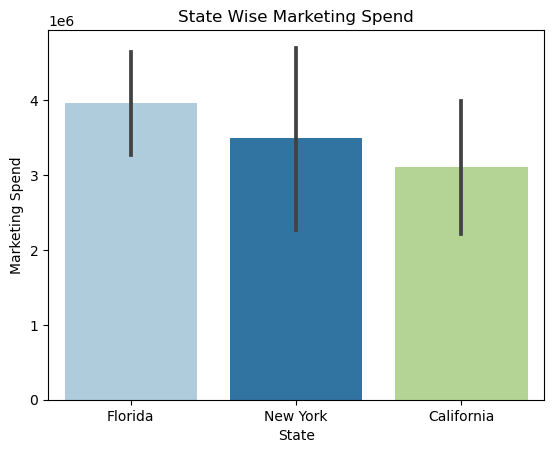

In [45]:
sns.barplot(df,x='State',y='Marketing Spend',estimator='sum',order=['Florida','New York','California'],palette='Paired')
plt.title("State Wise Marketing Spend")
plt.show()

In [ ]:
## Insights - 
# highest marketing spend is in florida state and then new york state.
# New york state having sligthly more profit than florida even after slightly less marketing spend but R&D spend is more.

In [ ]:
## Final insights of data - 
# profit will increase when we increase R&D Spend and Marketing spend in state.
# New york will give more profit if we spend more in R&D, Marketing.
# Do not spend more on administration, it will not increase profitability.

# Linear Regression Machine learning Model Building

In [46]:
## import machine learning library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# feature Engineering 

In [47]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [48]:
## define x= independent varibale, y= dependent variable
x=df[['R&D Spend','Administration','Marketing Spend']]
y=df['Profit']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1234) ## split x&y into 80:20 ratio

In [50]:
x_train.shape,y_train.shape ## training dataset shape

((40, 3), (40,))

In [51]:
x_test.shape,y_test.shape ## testing dataset shape

((10, 3), (10,))

In [52]:
model=LinearRegression()

In [53]:
model_fit=model.fit(x_train,y_train) ## fit into model

In [54]:
## intercept of model
print(round(model_fit.intercept_,0))

53108.0


In [55]:
## coef of model
print(np.around(model_fit.coef_,2))

[ 0.82 -0.05  0.02]


In [56]:
y_pred=model_fit.predict(x_test)

In [57]:
df_y_pred=pd.DataFrame(y_pred,columns=['profit_pred']) ## convert into dataframe.
df_y_pred['profit_actual']=y_test.values ## add actual profit column into pred dataframe.

In [58]:
df_y_pred

,profit_pred,profit_actual
0,90918.231401,89949.14
1,47820.549804,64926.08
2,158940.444007,156122.51
3,64234.182698,65200.33
4,127236.067021,134307.35
5,74619.279439,90708.19
6,151253.627355,152211.77
7,101619.296101,101004.64
8,172942.753513,166187.94
9,48279.830121,14681.40


In [59]:
## check model strenght
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

In [60]:
r2_score(df_y_pred['profit_pred'],df_y_pred['profit_actual']) ## r2_score of model

0.9080081325954581

In [61]:
mean_absolute_error(df_y_pred['profit_pred'],df_y_pred['profit_actual']) ## MAS of model

8694.493882608911

In [62]:
sqrt(mean_squared_error(df_y_pred['profit_pred'],df_y_pred['profit_actual'])) ## RMSE of model

13368.045600365653

# check another best model if any-1

In [63]:
df1=pd.get_dummies(df['State']) ## creat dummy dataframe on state
final_data=pd.concat([df,df1],axis=1) ## convcatenate both dataframe
final_data.columns ## columns in final_data

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'California', 'Florida', 'New York'],
      dtype='object')

In [64]:
x1=final_data[['R&D Spend', 'Administration', 'Marketing Spend','California', 'Florida', 'New York']]
y1=final_data['Profit']

In [65]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,train_size=0.8,random_state=1234) ## split x&y into 80:20 ratio

In [66]:
x1_train.shape,y1_train.shape ## training dataset shape

((40, 6), (40,))

In [67]:
x1_test.shape,y1_test.shape ## testing dataset shape

((10, 6), (10,))

In [68]:
model1=LinearRegression()

In [69]:
model1_fit=model1.fit(x1_train,y1_train) ## fit into model

In [70]:
## intercept of model
print(round(model1_fit.intercept_,0))

53492.0


In [71]:
## coef of model
print(np.around(model1_fit.coef_,2))

[ 8.30000e-01 -5.00000e-02  2.00000e-02  2.17533e+03 -5.29300e+02
 -1.64603e+03]


In [72]:
y1_pred=model1_fit.predict(x1_test)

In [73]:
df_y1_pred=pd.DataFrame(y1_pred,columns=['profit_pred']) ## convert into dataframe.
df_y1_pred['profit_actual']=y1_test.values ## add actual profit column into pred dataframe.

In [74]:
df_y1_pred

,profit_pred,profit_actual
0,93360.996545,89949.14
1,45920.088065,64926.08
2,161567.710943,156122.51
3,66121.864728,65200.33
4,129529.976303,134307.35
5,73854.477576,90708.19
6,149808.702716,152211.77
7,99933.265446,101004.64
8,173018.075160,166187.94
9,50196.748206,14681.40


In [75]:
r2_score(df_y1_pred['profit_pred'],df_y1_pred['profit_actual']) ## r2_score of model

0.896506702813191

In [76]:
mean_absolute_error(df_y1_pred['profit_pred'],df_y1_pred['profit_actual']) ## MAS of model

9623.559547546312

In [77]:
sqrt(mean_squared_error(df_y1_pred['profit_pred'],df_y1_pred['profit_actual'])) ## RMSE of model

14230.784013195884

# check another best model if any-2

In [78]:
x2=final_data[['R&D Spend', 'Marketing Spend','California', 'Florida', 'New York']]
y2=final_data['Profit']

In [79]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,train_size=0.8,random_state=1234) ## split x&y into 80:20 ratio

In [80]:
model2=LinearRegression()

In [81]:
model2_fit=model2.fit(x2_train,y2_train) ## fit into model

In [82]:
y2_pred=model2_fit.predict(x2_test)

In [83]:
df_y2_pred=pd.DataFrame(y2_pred,columns=['profit_pred']) ## convert into dataframe.
df_y2_pred['profit_actual']=y2_test.values ## add actual profit column into pred dataframe.

In [84]:
df_y2_pred

,profit_pred,profit_actual
0,89979.838228,89949.14
1,46837.971405,64926.08
2,161397.185020,156122.51
3,68079.025092,65200.33
4,130085.000866,134307.35
5,74847.492874,90708.19
6,151150.605053,152211.77
7,101659.889595,101004.64
8,170618.720438,166187.94
9,50582.970665,14681.40


In [85]:
r2_score(df_y2_pred['profit_pred'],df_y2_pred['profit_actual']) ## r2_score of model

0.8982643864273792

In [86]:
mean_absolute_error(df_y2_pred['profit_pred'],df_y2_pred['profit_actual']) ## MAS of model

8840.39888395535

In [87]:
sqrt(mean_squared_error(df_y2_pred['profit_pred'],df_y2_pred['profit_actual'])) ## RMSE of model

13938.398964874525

# check another best model if any-3

In [88]:
x3=df[['R&D Spend','Marketing Spend']]
y3=df['Profit']

In [89]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,train_size=0.8,random_state=1234) ## split x&y into 80:20 ratio

In [90]:
model3=LinearRegression()

In [91]:
model3_fit=model3.fit(x3_train,y3_train) ## fit into model

In [92]:
y3_pred=model3_fit.predict(x3_test)

In [93]:
df_y3_pred=pd.DataFrame(y3_pred,columns=['profit_pred']) ## convert into dataframe.
df_y3_pred['profit_actual']=y3_test.values ## add actual profit column into pred dataframe.

In [94]:
df_y3_pred

,profit_pred,profit_actual
0,87930.135410,89949.14
1,48424.265506,64926.08
2,158920.287809,156122.51
3,66100.730634,65200.33
4,127825.069374,134307.35
5,75657.657917,90708.19
6,152241.866950,152211.77
7,102967.966688,101004.64
8,170936.956247,166187.94
9,48709.287104,14681.40


In [95]:
r2_score(df_y3_pred['profit_pred'],df_y3_pred['profit_actual']) ## r2_score of model

0.9087079782231271

In [96]:
mean_absolute_error(df_y3_pred['profit_pred'],df_y3_pred['profit_actual'])

8452.21372262077

In [97]:
sqrt(mean_squared_error(df_y3_pred['profit_pred'],df_y3_pred['profit_actual']))

13182.825322386234

In [98]:
## r2 score of first model is more and closed to 1, so consider as strong model.
## so we are finalised model_fit linear regression model and save it using library.

In [99]:
## save the model
import joblib

In [100]:
filename='50_startup_multiple_regression_model.sav' ## file name of model
joblib.dump(model_fit,filename) ## model dump into above filename

['50_startup_multiple_regression_model.sav']

In [101]:
## load the model
load_model=joblib.load(filename)
print(load_model)

LinearRegression()


In [102]:
y_var_predict=load_model.predict(x_test)


In [103]:
y_var_predict

array([ 90918.23140091,  47820.54980416, 158940.44400736,  64234.18269816,
       127236.06702092,  74619.27943912, 151253.62735473, 101619.29610083,
       172942.7535134 ,  48279.83012068])